# Problema 1

Se tiene una placa cuadrada de aluminio cuyos bordes están en las condiciones que se indican en la
figura: tres lados a temperaturas fijas y otro, el inferior, aislado térmicamente (flujo de calor igual a
cero). Encuentre, utilizando el método de diferencias finitas, los valores de temperatura y flujo de
calor para cada punto. Utilice primero la grilla señalada y luego generalice el problema a un número
variable de nodos en cada eje de coordenadas. Haga un estudio del tiempo de cálculo en función del
tamaño del sistema.


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import copy as cp


In [33]:
# Condiciones de contorno
Tu=100
Td=0
Tl=75
Tr=50
#q=["d"]
# Grilla
nx=3
ny=3
x=1


In [34]:
def temp(Tl, Tu, Tr, Td, nx,ny, q=False):
    b=np.zeros(nx*ny)
    A=np.identity(nx*ny)
    B=ny/nx
    x=1/(nx+1)
    y=1/(ny+1)

    b[0]=(Td+Tl)/2
    b[(nx-1)]=(Td+Tr)/2
    b[(ny-1)*nx]=(Tu+Tl)/2
    b[nx-1 + (ny-1)*nx]=(Tu+Tr)/2

    if q==False:
        
        print("Sin calor")
        for i in range(1,nx-1):
            b[i]=Td
            b[i + (ny-1)*nx]=Tu
        for j in range(1,ny-1):
            b[0 + j*nx]=Tl
            b[nx-1 + j*nx]=Tr


        for i in range(1,nx-1):
            for j in range(1,ny-1):
                k= i + j*nx
                A[k,k-1]=1
                A[k,k-nx]=B**2
                A[k,k]=-2*(1+B**2)
                A[k,k+1]=1
                A[k,k+nx]=B**2

    elif "u" in q:
            
            print("q up")
            for i in range(1,nx-1):
                b[i]=Td
                b[i + (ny-1)*nx]=Tu*2*x
            for j in range(1,ny-1):
                b[0 + j*nx]=Tl
                b[nx-1 + j*nx]=Tr

            for i in range(1,nx-1):
                for j in range(1,ny-1):
                    k= i + j*nx
                    A[k,k-1]=1
                    A[k,k-nx]=2*B**2
                    A[k,k]=-2*(1+B**2)
                    A[k,k+1]=1

    elif "d" in q:

            print("q down")
            for i in range(1,nx-1):
                b[i]=Td*2*x
                b[i + (ny-1)*nx]=Tu
            for j in range(1,ny-1):
                b[0 + j*nx]=Tl
                b[nx-1 + j*nx]=Tr

            for i in range(1,nx-1):
                for j in range(1,ny-1):
                    k= i + j*nx
                    A[k,k-1]=1
                    A[k,k+nx]=2*(B**2)
                    A[k,k]=-2*(1+B**2)
                    A[k,k+1]=1
                    

    elif "l" in q:

            print("q left")
            for i in range(1,nx-1):
                b[i]=Td
                b[i + (ny-1)*nx]=Tu
            for j in range(1,ny-1):
                b[0 + j*nx]=Tl*2*x
                b[nx-1 + j*nx]=Tr

            for i in range(1,nx-1):
                for j in range(1,ny-1):
                    k= i + j*nx
                    A[k,k+1]=2
                    A[k,k-nx]=B**2
                    A[k,k]=-2*(1+B**2)
                    A[k,k+nx]=B**2

    else:
            print("q right")
            for i in range(1,nx-1):
                b[i]=Td
                b[i + (ny-1)*nx]=Tu
            for j in range(1,ny-1):
                b[0 + j*nx]=Tl
                b[nx-1 + j*nx]=Tr*2*x

            for i in range(1,nx-1):
                for j in range(1,ny-1):
                    k= i + j*nx
                    A[k,k-1]=2
                    A[k,k-nx]=B**2
                    A[k,k]=-2*(1+B**2)
                    A[k,k+nx]=B**2
                    
    t= np.linalg.solve(A,b)
    
        
    T=np.zeros([nx,ny])
    for i in range(nx):
        for j in range(ny):
            T[j,i]=t[i+nx*j]
    
    Fx = np.zeros([nx,ny]) 
    Fy = np.zeros([nx,ny])

    for i in range(nx-1):
        for j in range(ny-1):
            Fx[j,0]=(T[j,1]-T[j,0])/x
            Fx[j,i]=(T[j,i+1]-T[j,i-1])/(2*x)
            Fx[j,nx-1]=(T[j,nx-1]-T[j,nx-2])/x

    for i in range(nx-1):
        for j in range(ny-1):
            Fy[0,i]=(T[1,i]-T[0,i])/x
            Fy[j,i]=(T[j+1,i]-T[j-1,i])/(2*x)
            Fy[ny-1,i]=(T[ny-1,i]-T[nx-2,i])/x
    
    return A, b, t, T, Fx, Fy


q down


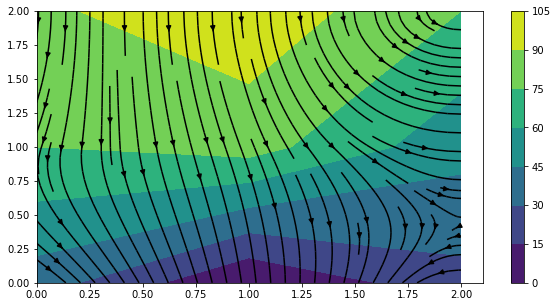

In [35]:
n=3
nx=n
ny=n
A, b, t, T, Fx, Fy= temp(Tl, Tu, Tr, Td, nx, ny, q="d")
            
x = np.linspace(0,nx-1,nx).astype(int) #astype para definir numeros enteros
y = np.linspace(0,ny-1,ny).astype(int)
X,Y = np.meshgrid(x,y)

plt.rc('figure', figsize = (10,5))
plt.contourf(T)
plt.colorbar()        
plt.streamplot(X,Y,-Fx,-Fy,color='k')

In [36]:
T,Fx, Fy

(array([[ 37.5 ,   0.  ,  25.  ],
        [ 75.  ,  81.25,  50.  ],
        [ 87.5 , 100.  ,  75.  ]]),
 array([[-150.,  -25.,  100.],
        [  25.,  -50., -125.],
        [   0.,    0.,    0.]]),
 array([[150., 325.,   0.],
        [100., 200.,   0.],
        [ 50.,  75.,   0.]]))